In [2]:
import pandas as pd
columnNames = ["RND","ADMIN","MKT","STATE","PROFIT"]
dataframe = pd.read_csv("assets/50_Startups.csv", header=None, names=columnNames)

In [3]:
import numpy as np
MEAN_PROFIT = np.mean(dataframe.PROFIT)

In [4]:
NEWPROFIT = []
for profit in dataframe.PROFIT:
    if(profit<MEAN_PROFIT):
        NEWPROFIT.append(0)
    else:
        NEWPROFIT.append(1)
dataframe["NEWPROFIT"] = NEWPROFIT

In [5]:
X = dataframe[["RND","MKT"]]
Y = dataframe[["NEWPROFIT"]]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,Y,test_size=0.2)

In [6]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

/Users/prathameshmadur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/prathameshmadur/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
#results = pd.DataFrame()
#results["actual"] = ytest
#results["predicted"] = pred
#not working need to check

In [8]:
ytest["predicted"] = pred

/Users/prathameshmadur/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [9]:
ytest

,NEWPROFIT,predicted
45,0,1
4,1,1
33,0,0
8,1,1
16,1,0
46,0,0
42,0,0
25,0,1
30,0,1
12,1,1


In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest["NEWPROFIT"],ytest["predicted"])

array([[3, 3],
       [1, 3]])

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score,f1_score
print(accuracy_score(ytest.NEWPROFIT,pred))
print(confusion_matrix(ytest.NEWPROFIT,pred))
print(f1_score(ytest.NEWPROFIT,pred))
print(roc_auc_score(ytest.NEWPROFIT,pred))

0.6
[[3 3]
 [1 3]]
0.6
0.625


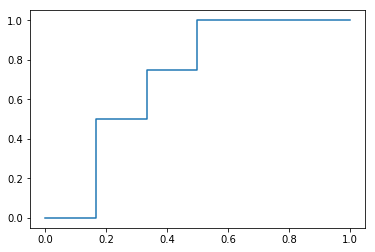

In [19]:
import sklearn.metrics as m
probs = lr.predict_proba(xtest)

predsOnProbs = probs[:,1]

fpr, tpr, threshold = m.roc_curve(ytest["NEWPROFIT"], predsOnProbs)
roc_auc = m.auc(fpr, tpr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, roc_auc)